#### CO2 Emissions by sector - United States (2019 and 2020)

We present the estimates of daily, sector-specific, country-level (United States) CO2 emissions from January 1st, 2019 to June 30th, 2020, constructed primarily from near-real-time activity data, results of the international research initiative Carbon Monitor (https://carbonmonitor.org/). These estimates provide a picture of the daily, weekly, and seasonal dynamics of CO2 emissions before and after the COVID-19 pandemic and the economic downturn that it has triggered.

Daily CO2 emissions by sectors in 2019 and January 1st through July 1st 2020 for 
a) Power sector, 
b) Ground transportation sector, 
b) Industry sector,
d) Residential sector, and 
e) Aviation (domestic) sector 

We begin by analyzing the column features

Analyzing data from the source datasets We import the required modules

In [276]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages


In [277]:
df_sector = pd.read_excel(r'C:\Users\a687u420\OneDrive - The University of Kansas\KU courses\Fall 2020\Project\Data\Carbon monitor\carbon-monitor-US.xlsx')
df_sector.head(10)

,country / group of countries,date,sector,MtCO2 per day
0,US,01/01/2019,Power,4.197798
1,US,02/01/2019,Power,5.113159
2,US,03/01/2019,Power,5.029980
3,US,04/01/2019,Power,4.946244
4,US,05/01/2019,Power,4.468191
5,US,06/01/2019,Power,3.761825
6,US,07/01/2019,Power,4.300100
7,US,08/01/2019,Power,4.215780
8,US,09/01/2019,Power,4.809652
9,US,10/01/2019,Power,5.307314


In [278]:
df_sector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735 entries, 0 to 2734
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country / group of countries  2735 non-null   object 
 1   date                          2735 non-null   object 
 2   sector                        2735 non-null   object 
 3   MtCO2 per day                 2735 non-null   float64
dtypes: float64(1), object(3)
memory usage: 85.6+ KB


In [279]:
df_sector.index=pd.to_datetime(df_sector.date,format='%d/%m/%Y')
df_sector = df_sector.set_index('date')
df_sector.index
df_sector.head(10)

,country / group of countries,sector,MtCO2 per day
date,,,
01/01/2019,US,Power,4.197798
02/01/2019,US,Power,5.113159
03/01/2019,US,Power,5.029980
04/01/2019,US,Power,4.946244
05/01/2019,US,Power,4.468191
06/01/2019,US,Power,3.761825
07/01/2019,US,Power,4.300100
08/01/2019,US,Power,4.215780
09/01/2019,US,Power,4.809652


In [280]:
ts = df_sector[pd.Series(pd.to_datetime(df_sector.index, errors='coerce')).notnull().values]
ts.head(15)

,country / group of countries,sector,MtCO2 per day
date,,,
01/01/2019,US,Power,4.197798
02/01/2019,US,Power,5.113159
03/01/2019,US,Power,5.029980
04/01/2019,US,Power,4.946244
05/01/2019,US,Power,4.468191
06/01/2019,US,Power,3.761825
07/01/2019,US,Power,4.300100
08/01/2019,US,Power,4.215780
09/01/2019,US,Power,4.809652


In [281]:
ts.dtypes

country / group of countries     object
sector                           object
MtCO2 per day                   float64
dtype: object

In [282]:
#ss = ts.copy(deep=True)
ts['MtCO2 per day'] = pd.to_numeric(ts['MtCO2 per day'] , errors='coerce')
ts.head(20)

,country / group of countries,sector,MtCO2 per day
date,,,
01/01/2019,US,Power,4.197798
02/01/2019,US,Power,5.113159
03/01/2019,US,Power,5.029980
04/01/2019,US,Power,4.946244
05/01/2019,US,Power,4.468191
06/01/2019,US,Power,3.761825
07/01/2019,US,Power,4.300100
08/01/2019,US,Power,4.215780
09/01/2019,US,Power,4.809652


In [283]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2735 entries, 01/01/2019 to 30/09/2020
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country / group of countries  2735 non-null   object 
 1   sector                        2735 non-null   object 
 2   MtCO2 per day                 2735 non-null   float64
dtypes: float64(1), object(2)
memory usage: 85.5+ KB


In [284]:
ts.dropna(inplace = True)

In [285]:
Energy_sources = ts.groupby('sector')
Energy_sources.head()

,country / group of countries,sector,MtCO2 per day
date,,,
01/01/2019,US,Power,4.197798
02/01/2019,US,Power,5.113159
03/01/2019,US,Power,5.029980
04/01/2019,US,Power,4.946244
05/01/2019,US,Power,4.468191
01/01/2019,US,Ground Transport,3.898663
02/01/2019,US,Ground Transport,3.207027
03/01/2019,US,Ground Transport,4.597128
04/01/2019,US,Ground Transport,4.844315


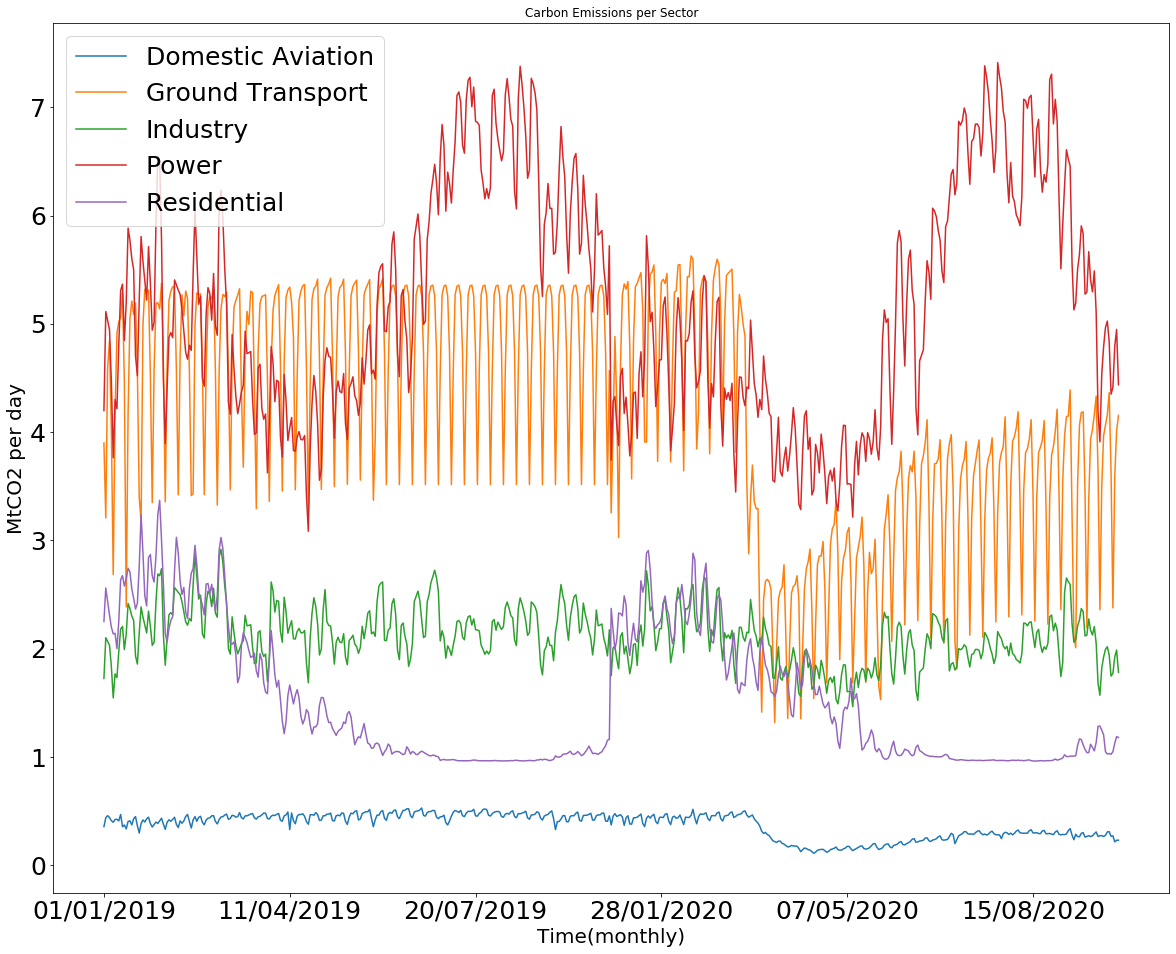

In [286]:
#Global CO2 emission by sector
fig, ax = plt.subplots()
for desc, group in Energy_sources:
    group.plot(y='MtCO2 per day', label=desc,ax = ax, title='Carbon Emissions per Sector', fontsize = 25)
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2 per day')
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.legend(fontsize = 25)

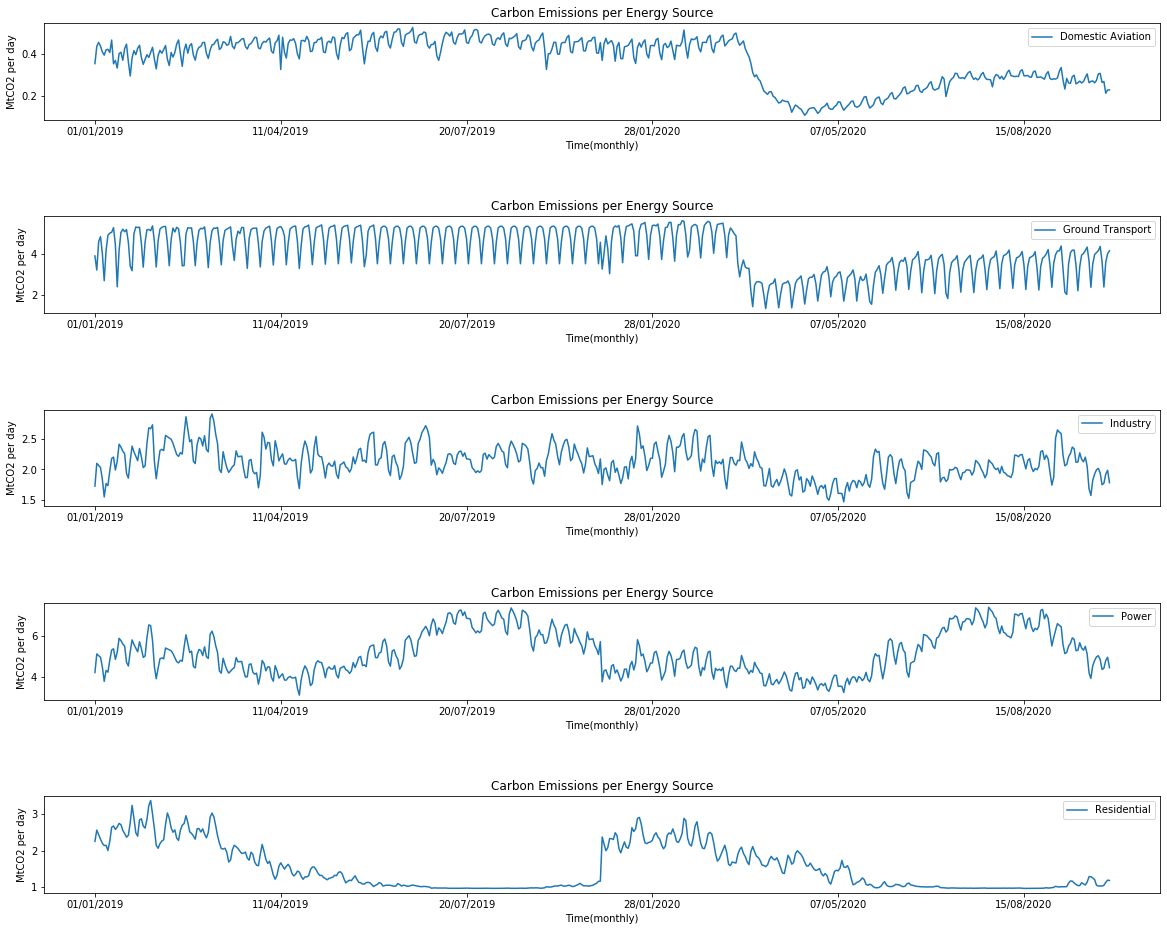

In [287]:
#Plotting sectorwise for better interpretation

fig, axes = plt.subplots(5,1)
plt.subplots_adjust(hspace=1)
for (desc, group), ax in zip(Energy_sources, axes):
    group.plot(y='MtCO2 per day', ax=ax, label=desc, title='Carbon Emissions per Energy Source')
    ax.set_xlabel('Time(monthly)')
    ax.set_ylabel('MtCO2 per day')
plt.show()

U.S. emissions were 14.8% lower in June of 2020 than in June of 2019, even though lockdowns were at the same time being relaxed throughout the country. As observed, he ground transport, Insutry , power, and residential sector were mainly affected by the COVID locdown in the first quarter of the 2020 year compared to 2019.